# Toy Analysis and Classification

### Project Description

This project is the analysis of a product requested by a client based in China. The company operations are exportation of different kinds of toys from several suppliers in China to multinational supermarket chains established in LATAM.

## Data

The client informed us that the data available they have is the stock inventory warehouse data from the client, located in China. This warehouse is the one that ships the product to LATAM. The data set is a compound of 10000 items with attributes such as size, weight, volume, and package.

### Analysing the Data

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
# As each project is saved in an unique folder, we need to set the working directory properly.
path = os.getcwd()
print(path)

/Users/mariomauvecin/Desktop


In [4]:
os.chdir('/Users/mariomauvecin/Desktop/DATA SCIENCE/DATA SCIENCE PROJECTS/TOY EXPORTATION') #Changing the Directory

In [5]:
os.getcwd()

'/Users/mariomauvecin/Desktop/DATA SCIENCE/DATA SCIENCE PROJECTS/TOY EXPORTATION'

In [6]:
#Creating a dataframe
toy_df = pd.read_csv('Suppliers_Catalog.csv', sep=';', header= 0, decimal = '.') 

In [7]:
toy_df.shape

(10000, 17)

In [8]:
toy_df.columns

Index(['Item No#', 'Description', 'Package', 'INNER', 'Qty/Ctn', 'CBM',
       'Carton long (cm)', 'Carton width', 'Carton height', 'Product long',
       'Product width', 'Product height', 'Packaging long', 'Packaging width',
       'Packaging height', 'GW(KGS)', 'NW(KGS)'],
      dtype='object')

In [9]:
toy_df.dtypes

Item No#             object
Description          object
Package              object
INNER               float64
Qty/Ctn               int64
CBM                  object
Carton long (cm)    float64
Carton width        float64
Carton height       float64
Product long         object
Product width        object
Product height      float64
Packaging long      float64
Packaging width     float64
Packaging height     object
GW(KGS)             float64
NW(KGS)             float64
dtype: object

### Dataframe columns and values.

The dataframe has 17 columns. The columns attributes are:

* The Item number
* A Description of the product
* The Package type
* The 'Inner' Values
* The Qty (Quantity)
* The Volume in Cubic Meters
* The Carton dimensions in cm.
    * Carton lenght
    * Carton width
    * Carton height
* The Product dimensions in cm.
    * Product lenght
    * Product width
    * Product height
* The Packaging dimensions in cm.
    * Packaging lenght
    * Packaging width
    * Packaging height
* The Gross weight in KG.
* The Net weight in KG.

In the data frame, some data values are not correct. We should re-classify the columns values types of some columns (CBM, Product long and width, Packaging height) because the values are classified as objects, and should be classified as numerical variables.

In [10]:
toy_df['CBM'] = toy_df['CBM'].str.replace(',', '.').astype(float)
toy_df['Product long'] = toy_df['Product long'].str.replace(',', '.').astype(float)
toy_df['Product width'] = toy_df['Product width'].str.replace(',', '.').astype(float)
toy_df['Packaging height'] = toy_df['Packaging height'].str.replace(',', '.').astype(float)

In [11]:
toy_df

,Item No#,Description,Package,INNER,Qty/Ctn,CBM,Carton long (cm),Carton width,Carton height,Product long,Product width,Product height,Packaging long,Packaging width,Packaging height,GW(KGS),NW(KGS)
0,AN933806,ANIMAL SET 4PCS,WINDOW BOX,0.0,72,0.242,72.5,35.5,94.0,0.0,0.0,0.0,26.7,7.5,22.5,18.0,14.5
1,AN954488,ANIMAL SET 4PCS,PVC BAG WITH HEADER,2.0,36,0.200,64.5,52.5,59.0,0.0,0.0,0.0,35.0,43.0,0.0,19.0,17.0
2,AN954489,ANIMAL SET 6PCS,PVC BAG WITH HEADER,2.0,36,0.200,64.5,52.5,59.0,24.0,8.5,13.0,0.0,0.0,0.0,19.0,17.0
3,AN956141,DINOSAUR SET 34PCS,PVC TUBE,3.0,24,0.211,71.0,43.0,69.0,0.0,0.0,0.0,20.0,20.0,21.0,17.0,15.0
4,AN956142,ANIMAL SET 34PCS,PVC TUBE,3.0,24,0.211,71.0,43.0,69.0,0.0,0.0,0.0,20.0,20.0,21.0,17.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,WSB964414,B/O SWORD WITH LIGHT AND SOUND,DISPLAY BOX,2.0,72,0.240,64.5,59.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,21.5,19.5
9996,WSB964415,B/O SWORD WITH LIGHT AND SOUND,WINDOW BOX,2.0,60,0.215,73.0,46.0,64.0,0.0,0.0,0.0,7.5,6.0,71.0,19.5,17.5
9997,WSB964416,B/O SWORD WITH LIGHT AND SOUND,DISPLAY BOX,3.0,72,0.239,93.0,39.0,66.0,0.0,0.0,0.0,NaN,NaN,NaN,22.0,19.0
9998,WSB956629,SWORD WITH LIGHT AND SOUND\n,BIND CARD,2.0,192,0.296,65.0,48.0,95.0,15.0,3.5,46.0,39.0,12.0,3.5,26.0,24.0


From data exploratory analysis we find that there are 10 K rows and 17 columns. Must of the columns are numerical values, but the three first columns are strings attributes.

In [12]:
#Lets see how the numerical variables are distributed
toy_df.describe()

,INNER,Qty/Ctn,CBM,Carton long (cm),Carton width,Carton height,Product long,Product width,Product height,Packaging long,Packaging width,Packaging height,GW(KGS),NW(KGS)
count,9745.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9031.000000,9031.000000,8905.000000,9863.000000,9863.000000,9889.000000,9981.000000,9995.000000
mean,1.379374,124.938200,0.237879,74.911910,42.653980,71.577540,7.960665,3.833382,4.932617,20.210590,7.573989,15.963585,20.255057,18.079128
std,1.017320,206.777673,0.118930,15.718164,10.528546,19.592152,15.367712,9.347537,10.751357,17.246599,7.569396,13.814170,8.726108,8.193619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.000000,0.169000,64.500000,35.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,14.000000
50%,2.000000,60.000000,0.245000,77.000000,41.000000,74.000000,0.000000,0.000000,0.000000,19.500000,6.000000,16.000000,21.000000,18.700000
75%,2.000000,144.000000,0.310000,86.000000,48.000000,85.000000,12.000000,5.300000,6.500000,31.000000,11.000000,26.000000,25.000000,23.000000
max,12.000000,5000.000000,3.797000,202.000000,188.000000,183.000000,152.000000,407.000000,138.000000,94.000000,47.200000,95.500000,63.000000,60.000000


In [13]:
# Do we have missing values?
toy_df.isnull().sum(axis = 0)

Item No#               0
Description            0
Package                2
INNER                255
Qty/Ctn                0
CBM                    0
Carton long (cm)       0
Carton width           0
Carton height          0
Product long         969
Product width        969
Product height      1095
Packaging long       137
Packaging width      137
Packaging height     111
GW(KGS)               19
NW(KGS)                5
dtype: int64

## Types of products 

At first, an analysis of the types of products could show how the products are organized. In that way, I will create a data frame with only the categorical values of each product, and analyze it 

In [15]:
cat_toy_df = toy_df.select_dtypes(include=['object']).copy()

In [16]:
cat_toy_df.head(5)

,Item No#,Description,Package
0,AN933806,ANIMAL SET 4PCS,WINDOW BOX
1,AN954488,ANIMAL SET 4PCS,PVC BAG WITH HEADER
2,AN954489,ANIMAL SET 6PCS,PVC BAG WITH HEADER
3,AN956141,DINOSAUR SET 34PCS,PVC TUBE
4,AN956142,ANIMAL SET 34PCS,PVC TUBE


In [17]:
print(cat_toy_df.isnull().values.sum()) 

2


In [18]:
print(cat_toy_df.isnull().sum()) #two missing values.

Item No#       0
Description    0
Package        2
dtype: int64


In [19]:
cat_toy_df['Description'].value_counts()

ANIMAL                                 269
ACTION FIGURE                          196
MODELLING DOUGH                        195
FREEWHEEL CONSTRUCTION VEHICLE         136
11.5”SOLID FASHION DOLL                129
                                      ... 
BEAUTY SET                               1
METAL BUILDING BLOCKS  103PCS            1
BUILDING BLOCKS  159PCS                  1
FURNITURE SET WITH LIGHT AND MUSIC       1
FREEWHEEL SET                            1
Name: Description, Length: 2386, dtype: int64

In [20]:
cat_toy_df['Package'].value_counts()

WINDOW BOX              2959
COLOR BOX               1356
OPEN TOUCH BOX          1021
BLISTER CARD             898
POLY BAG                 626
                        ... 
HANGTAG+PLASTIC BOX        1
CARRY BAG+WRAP CARD        1
DISPLAY BOX+HAND BOX       1
NET BAG                    1
TIN BAG                    1
Name: Package, Length: 98, dtype: int64

In [21]:
cat_toy_df['Item No#'].value_counts()

TS963006     1
AN971300     1
OT961744     1
LK969750     1
LK974852     1
            ..
VM972201     1
TBR975150    1
BT971916     1
EG971050     1
AN969532     1
Name: Item No#, Length: 10000, dtype: int64

So far, we could see that the 'Item No#' column is a unique value per each product (in logistic this value is known as SKU or Stock Keeping Unit), the 'Description' value describes the product type of each item, and the 'Package' is the type of package that each product has. 
From the exchange with the client, we have already found that the same product could have a different package, and correspond to a different SKU and this is usually associated with the perceived quality and value. 

## Package Analysis

From the previous analysis, we find that the SKU is a unique value, but the "Description" might represent the same product with a different package. On the other side, the package type varies between packages widely use, to some others with just one product.

In [23]:
 cat_toy_df['Package'].value_counts()

WINDOW BOX              2959
COLOR BOX               1356
OPEN TOUCH BOX          1021
BLISTER CARD             898
POLY BAG                 626
                        ... 
HANGTAG+PLASTIC BOX        1
CARRY BAG+WRAP CARD        1
DISPLAY BOX+HAND BOX       1
NET BAG                    1
TIN BAG                    1
Name: Package, Length: 98, dtype: int64

In [24]:
Product_per_Package = cat_toy_df['Package'].value_counts()

In [25]:
Product_per_Package.head(15) # Arbitrary selected the 15th largest Packages Types. 

WINDOW BOX             2959
COLOR BOX              1356
OPEN TOUCH BOX         1021
BLISTER CARD            898
POLY BAG                626
PVC BAG WITH HEADER     564
DISPLAY BOX             353
MESH BAG W/TAG          197
PVC PLATFORM            162
DOUBLE BLISTER          134
COLOR GIFT BOX          103
HANGTAG                 101
WINDOW BOX+PDQ           94
HANGTAG+POLY BAG         91
SLIDE CARD               88
Name: Package, dtype: int64

In [26]:
Product_per_Package = Product_per_Package.head(12) # We choose only packages types with more than 100  items

In [27]:
Product_per_Package.sum()

8474

_Represents almost the 84% of the data_

In [28]:
Product_per_Package.array

<PandasArray>
[2959, 1356, 1021, 898, 626, 564, 353, 197, 162, 134, 103, 101]
Length: 12, dtype: int64

### Package Visualization

In [29]:
import matplotlib.pyplot as plt

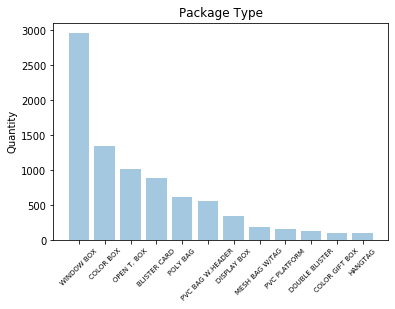

In [30]:
objects = ('WINDOW BOX','COLOR BOX','OPEN T. BOX','BLISTER CARD', 'POLY BAG','PVC BAG W.HEADER', 'DISPLAY BOX',
           'MESH BAG W/TAG', 'PVC PLATFORM','DOUBLE BLISTER', 'COLOR GIFT BOX','HANGTAG')
y_pos = np.arange(len(objects))
performance = [2959, 1356, 1021, 898, 626, 564, 353, 197, 162, 134, 103, 101]

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects, rotation=45, fontsize=7)
plt.ylabel('Quantity')
plt.title('Package Type')

plt.show()

## Creating Variables and Data Visualization

The next step in the process is to create variables that could be useful, to improve the understanding of the data frame and to visualize their distribution.

In [31]:
def Package_weight(x, y):
    if x > 0:
        res = y - x 
    else:
        res = 0
    return res

toy_df['Package_weight'] = toy_df.apply(lambda x: Package_weight(x['NW(KGS)'], x['GW(KGS)']), axis = 1)
toy_df['Package_weight'].head()

0    3.5
1    2.0
2    2.0
3    2.0
4    2.0
Name: Package_weight, dtype: float64

In [32]:
toy_df.describe()

,INNER,Qty/Ctn,CBM,Carton long (cm),Carton width,Carton height,Product long,Product width,Product height,Packaging long,Packaging width,Packaging height,GW(KGS),NW(KGS),Package_weight
count,9745.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9031.000000,9031.000000,8905.000000,9863.000000,9863.000000,9889.000000,9981.000000,9995.000000,9996.000000
mean,1.379374,124.938200,0.237879,74.911910,42.653980,71.577540,7.960665,3.833382,4.932617,20.210590,7.573989,15.963585,20.255057,18.079128,2.152923
std,1.017320,206.777673,0.118930,15.718164,10.528546,19.592152,15.367712,9.347537,10.751357,17.246599,7.569396,13.814170,8.726108,8.193619,1.296244
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.500000
25%,0.000000,24.000000,0.169000,64.500000,35.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,14.000000,2.000000
50%,2.000000,60.000000,0.245000,77.000000,41.000000,74.000000,0.000000,0.000000,0.000000,19.500000,6.000000,16.000000,21.000000,18.700000,2.000000
75%,2.000000,144.000000,0.310000,86.000000,48.000000,85.000000,12.000000,5.300000,6.500000,31.000000,11.000000,26.000000,25.000000,23.000000,3.000000
max,12.000000,5000.000000,3.797000,202.000000,188.000000,183.000000,152.000000,407.000000,138.000000,94.000000,47.200000,95.500000,63.000000,60.000000,14.000000


The variable 'Package_weight' results from the subtraction from the gross weight of the net weight.

In [33]:
toy_df['Package_weight'].describe()

count    9996.000000
mean        2.152923
std         1.296244
min       -49.500000
25%         2.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: Package_weight, dtype: float64

The values of this variable could not be **negative**. A package always represents weight.

In [34]:
indexPackage = toy_df[ toy_df['Package_weight'] <= 0 ].index
# Delete rows with negative values
toy_df.drop(indexPackage , inplace=True)

In [35]:
toy_df['Package_weight'].describe()

count    9271.000000
mean        2.348807
std         0.895711
min         0.300000
25%         2.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: Package_weight, dtype: float64

### Analyzing the weight per type of package

In [36]:
toy_df_pivot = pd.pivot_table(toy_df, values = ['Package_weight'], index ='Package', aggfunc = np.mean)
toy_df_pivot.sort_values('Package_weight', ascending=False)

,Package_weight
Package,
WRAPPING CARD+HAND BOX,4.750000
COLOR GIFT BOX+PDQ,3.462222
COLOR GIFT BOX+SHRINK FILM,3.285714
HAND BASKET +HANGTAG,3.200000
PLASTIC BARREL,3.187500
...,...
BULK,1.142857
CARTON,1.105882
HANGTAG+PDQ,1.083333


In [37]:
toy_df_pivot.sort_values('Package_weight', ascending=False).head(10)

,Package_weight
Package,
WRAPPING CARD+HAND BOX,4.750000
COLOR GIFT BOX+PDQ,3.462222
COLOR GIFT BOX+SHRINK FILM,3.285714
HAND BASKET +HANGTAG,3.200000
PLASTIC BARREL,3.187500
HAND BOX,3.043478
SLIDE CARD,3.010465
PE BAG W/HEADER,3.000000
TIN BAG+PDQ,3.000000


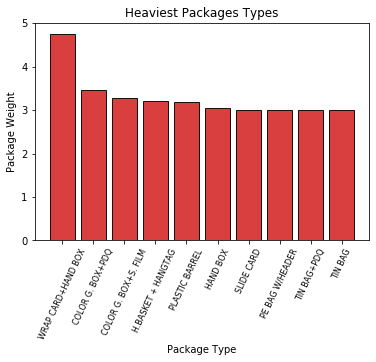

In [40]:
objects = ('WRAP CARD+HAND BOX','COLOR G. BOX+PDQ','COLOR G. BOX+S. FILM','H.BASKET + HANGTAG','PLASTIC BARREL', 'HAND BOX', 'SLIDE CARD',
           'PE BAG W/HEADER', 'TIN BAG+PDQ','TIN BAG')
y_pos = np.arange(len(objects))
performance = [4.750000, 3.462222, 3.285714, 3.200000, 3.187500, 3.043478, 3.010465, 3.000000, 3.000000, 3.000000]

plt.bar(y_pos, performance, align='center', color = 'tab:red', edgecolor = 'black', alpha=0.89)
plt.xticks(y_pos, objects, rotation=65, fontsize=8)
plt.ylabel('Package Weight')
plt.xlabel('Package Type')
plt.title('Heaviest Packages Types')
plt.ylim(0,5)

plt.show()

In [41]:
toy_df_pivot.sort_values('Package_weight', ascending=False).tail(10)

,Package_weight
Package,
SHRINK FILM,1.507692
HOLD-ALL,1.500000
PVC BUCKET,1.500000
ZIPLOCK BAG,1.300000
IRON CASE,1.250000
BULK,1.142857
CARTON,1.105882
HANGTAG+PDQ,1.083333
FOAM BOX,1.000000


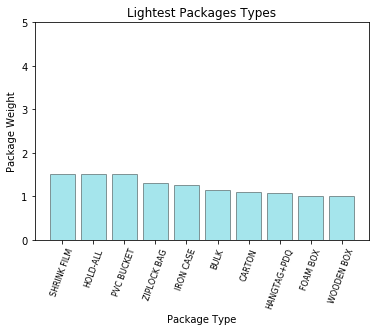

In [42]:
objects = ('SHRINK FILM','HOLD-ALL','PVC BUCKET','ZIPLOCK BAG', 'IRON CASE','BULK', 'CARTON', 'HANGTAG+PDQ', 
           'FOAM BOX','WOODEN BOX')
y_pos = np.arange(len(objects))
performance = [1.507692, 1.500000, 1.500000, 1.300000, 1.250000, 1.142857, 1.105882, 1.083333, 1.000000, 1.000000]

plt.bar(y_pos, performance, align='center', color = 'tab:cyan', edgecolor = 'black', alpha=0.39)
plt.xticks(y_pos, objects, rotation=70, fontsize=8)
plt.ylabel('Package Weight')
plt.xlabel('Package Type')
plt.title('Lightest Packages Types')
plt.ylim(0,5)

plt.show()

The choice of a __Heavy__ or a __Light__ package will add Freight value to the transport. Also, it is considered to be the reason for a perceived high value or cheap product type (In case the product is the same).

### Relation between the Gross Weight,  Net Weight and Volume

So far, we have seen the _Types of Packages_ more used, and both the **heaviest** and **lightest** packages. In order to understand the relations between both of them, we might represent the dimension of it in a _plot_.

#### Gross and Net Weight

Text(0, 0.5, 'Net Weight')

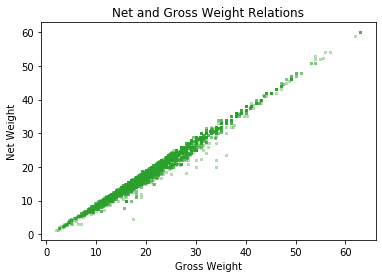

In [43]:
plt.scatter(toy_df['GW(KGS)'],toy_df['NW(KGS)'] , s=4, c='tab:green', marker=',', norm= True, alpha=0.3)
plt.title('Net and Gross Weight Relations')
plt.xlabel('Gross Weight')
plt.ylabel('Net Weight')

The gross and net weight are strong and linearly correlated between them. This allow us to predict that the gross weight, as this is highly correlated to the net weight, and we have items that are the same product (_same net weight_) but with a different package (_different gross weight_), will not vary highly except in the cases quoted as **"heavy packages"**

#### Volume and Gross Weight

(0, 1)

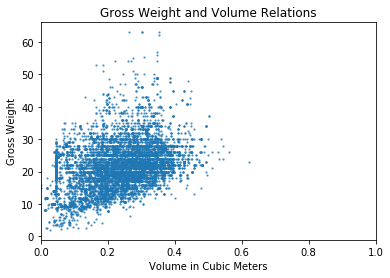

In [44]:
plt.scatter(toy_df['CBM'],toy_df['GW(KGS)'] ,  s=7, c='tab:blue', marker='.', norm= True, alpha=0.6)
plt.title('Gross Weight and Volume Relations')
plt.xlabel('Volume in Cubic Meters')
plt.ylabel('Gross Weight')
plt.xlim(0,1)

The last scatterplot shows the _distribution_ of the products in respect of their _weight_ and their _size_ messured in cubic meters. From this graphic, we have an insight that there might be groups of products whether their are **weight-related cargoes** (*more weight than volume*)or **volume-related cargoes** (*more volume than weight*). 